# Fraud Detection
## Rahnama College Challenge

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading dataset

In [3]:
# Read dataset from google drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Fraud.csv')
df.head(10)

,id,ProId,ProCreationTimestamp,CustId,CustCreationTimestamp,Rate,TaskCreationTimestamp,Price,ServiceId,CategoryId,ZoneId,TaskState,TargetProId,isFraud
0,VkSa32MyS738HMkfk4tEfk,vqUkxUDuEmB7gHWQvcYrBn,1552751751302,SgcxJApdnttAvEN9865TSZ,1565441404199,5,1565608270089,362000.0,bKv8JeCDhHBCe8SnfDcv66,VzkJEPR5H3mnqctJ8TW3YS,98DpwFpuLYJtF6jajghriE,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,FDPHLhrcjx3Gww4syg43Po,KaLEhwzZxCQ7GjPmVwBVav,1558262535289,EveEDVPDDDq3Ljh3bg8Exn,1561655121208,5,1563280381472,NaN,aegfi8HeWASAP6a9YkddeL,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,6Z7CCQoHpC8ga8KZbsgUbx,pybDYgTiCUv3Pv3WLgxKCM,1558538960723,mrDLWRmWuxGD7TVPAsD5X6,1545554406049,1,1566297337468,NaN,uDHVz7XXXRCkGKWRUe2jKp,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
3,n5DKFF8SJYoP57ypvpCEg5,zqPiDV33KwrMBZoyeQXMJW,1507727811649,aK3MnLeQywfLYMJJNyu7i8,1512288789660,4,1522825078700,NaN,Jy7nZvUqvwDUhcAG59wPcg,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
4,oCwEhmYhhzHkuZyqQCusFU,CR8z3ThPyzBKXFqqzemQAS,1560860808052,vHjzucgXFu9eA9YhuEeuk4,1561328838459,1,1564542737897,150000.0,f8o6yBmfeJiUTAmvpRCFAZ,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
5,trx3Lbf5YnjBbrTXzK3koK,gUbx9x9A73Drkb4QBJPpgh,1528991031333,eKCFEXnAyJdpWeM4XrFL4x,1532416728300,1,1532508168544,180000.0,aAkNmQxRakik386nZvYv9d,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
6,TyoLDBkbLomR6JMBuXcvUg,qx7qastwRLkRQEY2D6CSiB,1543148772561,ZEcVyk4i5BdWbcvjWUymga,1562500851511,1,1569828225868,390000.0,sDRRkkrrCx3krdGsGqwhFR,VzkJEPR5H3mnqctJ8TW3YS,4vmCuHsVCshaWa5e5WxrNK,Finished,NaN,False
7,PuqCTy4iZy36sTD5KBkBxJ,3hMiDjJx4Wo9NzKhpbTdR9,1546097644408,SdzLWkrqqzEWyZQEHo27DG,1555057077422,5,1555149245735,60000.0,UX7m6RWnKWvmw82URCyUMB,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
8,XjptSnKJYGV8fF6vrGyKLV,CY8WkG7JuedDkBneeiEchJ,1559027786245,oehNxzBhToswdDfqhNqoaL,1560547512948,5,1560671323376,40000.0,aAkNmQxRakik386nZvYv9d,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False
9,WEAC7xxtjguArBgwTuzubR,dkwSgXTyPhgfX7xQvq9PTm,1546670392940,puiQeyYywKet8giy4Fojze,1552319507877,5,1567321350566,140000.0,6WeBuz5wLE3oAbPmKWD4ex,VzkJEPR5H3mnqctJ8TW3YS,XZCnwH2vCRhHReoVx9X3XV,Finished,NaN,False


In [4]:
df.shape

(24855, 14)

# Data cleaning

In [5]:
# remove spaces and tabs from the name of columns and all will be lowercase
print('original column names:')
print(list(df.columns))
df = df.rename(mapper=str.strip, axis='columns')
df = df.rename(mapper=str.lower, axis='columns')
print('changed column names:')
print(list(df.columns))

original column names:
['id', 'ProId', 'ProCreationTimestamp', 'CustId', 'CustCreationTimestamp', 'Rate', 'TaskCreationTimestamp', 'Price', 'ServiceId', 'CategoryId', 'ZoneId', 'TaskState', 'TargetProId', 'isFraud']
changed column names:
['id', 'proid', 'procreationtimestamp', 'custid', 'custcreationtimestamp', 'rate', 'taskcreationtimestamp', 'price', 'serviceid', 'categoryid', 'zoneid', 'taskstate', 'targetproid', 'isfraud']


In [6]:
# change time values to standard form
# df['taskcreationtimestamp'] = pd.to_datetime(df['taskcreationtimestamp'])
# df.head(10)

## Remove undesired columns

In [7]:
# drop columns contains ID that are not important in our analysis
drop_cols = ['id', 'procreationtimestamp', 'custcreationtimestamp', 'serviceid', 'categoryid', 'zoneid']
df.drop(drop_cols, axis=1, inplace=True)
print(df.shape)
print(list(df.columns))

(24855, 8)
['proid', 'custid', 'rate', 'taskcreationtimestamp', 'price', 'taskstate', 'targetproid', 'isfraud']


In [8]:
df.head(10)

,proid,custid,rate,taskcreationtimestamp,price,taskstate,targetproid,isfraud
0,vqUkxUDuEmB7gHWQvcYrBn,SgcxJApdnttAvEN9865TSZ,5,1565608270089,362000.0,Finished,vqUkxUDuEmB7gHWQvcYrBn,False
1,KaLEhwzZxCQ7GjPmVwBVav,EveEDVPDDDq3Ljh3bg8Exn,5,1563280381472,NaN,Finished,YvvjyjpmXxj43RJGBHPq2n,False
2,pybDYgTiCUv3Pv3WLgxKCM,mrDLWRmWuxGD7TVPAsD5X6,1,1566297337468,NaN,Finished,NaN,False
3,zqPiDV33KwrMBZoyeQXMJW,aK3MnLeQywfLYMJJNyu7i8,4,1522825078700,NaN,Finished,NaN,False
4,CR8z3ThPyzBKXFqqzemQAS,vHjzucgXFu9eA9YhuEeuk4,1,1564542737897,150000.0,Finished,NaN,False
5,gUbx9x9A73Drkb4QBJPpgh,eKCFEXnAyJdpWeM4XrFL4x,1,1532508168544,180000.0,Finished,NaN,False
6,qx7qastwRLkRQEY2D6CSiB,ZEcVyk4i5BdWbcvjWUymga,1,1569828225868,390000.0,Finished,NaN,False
7,3hMiDjJx4Wo9NzKhpbTdR9,SdzLWkrqqzEWyZQEHo27DG,5,1555149245735,60000.0,Finished,NaN,False
8,CY8WkG7JuedDkBneeiEchJ,oehNxzBhToswdDfqhNqoaL,5,1560671323376,40000.0,Finished,NaN,False
9,dkwSgXTyPhgfX7xQvq9PTm,puiQeyYywKet8giy4Fojze,5,1567321350566,140000.0,Finished,NaN,False


In [9]:
# taskstate column checked to be sure it contains multiple unique values
print(df['taskstate'].unique())

['Finished' 'Canceled' 'Waiting']


In [10]:
# One Hot Encoding
df = pd.get_dummies(df, columns=["taskstate"])
df.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting
0,vqUkxUDuEmB7gHWQvcYrBn,SgcxJApdnttAvEN9865TSZ,5,1565608270089,362000.0,vqUkxUDuEmB7gHWQvcYrBn,False,0,1,0
1,KaLEhwzZxCQ7GjPmVwBVav,EveEDVPDDDq3Ljh3bg8Exn,5,1563280381472,NaN,YvvjyjpmXxj43RJGBHPq2n,False,0,1,0
2,pybDYgTiCUv3Pv3WLgxKCM,mrDLWRmWuxGD7TVPAsD5X6,1,1566297337468,NaN,NaN,False,0,1,0
3,zqPiDV33KwrMBZoyeQXMJW,aK3MnLeQywfLYMJJNyu7i8,4,1522825078700,NaN,NaN,False,0,1,0
4,CR8z3ThPyzBKXFqqzemQAS,vHjzucgXFu9eA9YhuEeuk4,1,1564542737897,150000.0,NaN,False,0,1,0
5,gUbx9x9A73Drkb4QBJPpgh,eKCFEXnAyJdpWeM4XrFL4x,1,1532508168544,180000.0,NaN,False,0,1,0
6,qx7qastwRLkRQEY2D6CSiB,ZEcVyk4i5BdWbcvjWUymga,1,1569828225868,390000.0,NaN,False,0,1,0
7,3hMiDjJx4Wo9NzKhpbTdR9,SdzLWkrqqzEWyZQEHo27DG,5,1555149245735,60000.0,NaN,False,0,1,0
8,CY8WkG7JuedDkBneeiEchJ,oehNxzBhToswdDfqhNqoaL,5,1560671323376,40000.0,NaN,False,0,1,0
9,dkwSgXTyPhgfX7xQvq9PTm,puiQeyYywKet8giy4Fojze,5,1567321350566,140000.0,NaN,False,0,1,0


## Handle Missing values

In [11]:
# Total number of empty cells in dataset
df.isnull().sum().sum()

28293

In [12]:
# Display total number of missing values for each column (sorted from highest to lowest one)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
missing_data.T

,targetproid,price,taskstate_Waiting,taskstate_Finished,taskstate_Canceled,isfraud,taskcreationtimestamp,rate,custid,proid
total,22304.000000,5989.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.897365,0.240958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# fill NAN prices with mean value
df['price'].fillna(np.nanmean(df['price']), inplace = True)
# fill NAN targetproid with mean value
df['targetproid'].fillna('no one', inplace = True)
# Total number of empty cells in dataset
df.isnull().sum().sum()

0

In [14]:
# check the result of filling missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent']) 
missing_data.T

,taskstate_Waiting,taskstate_Finished,taskstate_Canceled,isfraud,targetproid,price,taskcreationtimestamp,rate,custid,proid
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting
0,vqUkxUDuEmB7gHWQvcYrBn,SgcxJApdnttAvEN9865TSZ,5,1565608270089,362000.000000,vqUkxUDuEmB7gHWQvcYrBn,False,0,1,0
1,KaLEhwzZxCQ7GjPmVwBVav,EveEDVPDDDq3Ljh3bg8Exn,5,1563280381472,513763.772342,YvvjyjpmXxj43RJGBHPq2n,False,0,1,0
2,pybDYgTiCUv3Pv3WLgxKCM,mrDLWRmWuxGD7TVPAsD5X6,1,1566297337468,513763.772342,no one,False,0,1,0
3,zqPiDV33KwrMBZoyeQXMJW,aK3MnLeQywfLYMJJNyu7i8,4,1522825078700,513763.772342,no one,False,0,1,0
4,CR8z3ThPyzBKXFqqzemQAS,vHjzucgXFu9eA9YhuEeuk4,1,1564542737897,150000.000000,no one,False,0,1,0
5,gUbx9x9A73Drkb4QBJPpgh,eKCFEXnAyJdpWeM4XrFL4x,1,1532508168544,180000.000000,no one,False,0,1,0
6,qx7qastwRLkRQEY2D6CSiB,ZEcVyk4i5BdWbcvjWUymga,1,1569828225868,390000.000000,no one,False,0,1,0
7,3hMiDjJx4Wo9NzKhpbTdR9,SdzLWkrqqzEWyZQEHo27DG,5,1555149245735,60000.000000,no one,False,0,1,0
8,CY8WkG7JuedDkBneeiEchJ,oehNxzBhToswdDfqhNqoaL,5,1560671323376,40000.000000,no one,False,0,1,0
9,dkwSgXTyPhgfX7xQvq9PTm,puiQeyYywKet8giy4Fojze,5,1567321350566,140000.000000,no one,False,0,1,0


# Feature extraction

In [16]:
# extract some with rate feature
new_df = df[['proid', 'rate']].groupby('proid').mean()
new_df = new_df.rename(columns={'rate':'meanrate'})
df = pd.merge(df, new_df, how='right', on='proid')
df.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,5,1572678404841,1.900000e+05,DRC94LCr8Xj7va34Y5JJ4K,False,0,1,0,5.00
1,22i5AJEvzWmeNViZVZHmTQ,37Mhzi9A8AR6qAiwhgotpH,5,1575448487558,3.100000e+06,no one,False,0,1,0,5.00
2,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,5,1566548764588,8.000000e+04,no one,False,0,1,0,5.00
3,23L5xvqG6qp73Zuh8aBmdE,ewpJPtADmPXSpALnDfFbtw,1,1565957545075,4.700000e+05,no one,False,0,1,0,1.00
4,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,4,1548943802257,5.137638e+05,no one,False,0,1,0,4.75
5,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548259551065,4.000000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,4.75
6,258pjAdXRonen93HG5M4ps,Fo4fXwoPMjg9spNUWpzfNr,5,1549346004150,1.000000e+05,no one,True,0,1,0,4.75
7,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548256635750,3.500000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,4.75
8,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,5,1570382804356,8.000000e+04,no one,True,0,1,0,5.00
9,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,5,1567143807877,5.137638e+05,no one,False,0,1,0,5.00


In [17]:
# get the difference of each rate with the mean rate of each pro
df['diffmeanrate'] = df['rate'] - df['meanrate']
df.head(10)

,proid,custid,rate,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,meanrate,diffmeanrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,5,1572678404841,1.900000e+05,DRC94LCr8Xj7va34Y5JJ4K,False,0,1,0,5.00,0.00
1,22i5AJEvzWmeNViZVZHmTQ,37Mhzi9A8AR6qAiwhgotpH,5,1575448487558,3.100000e+06,no one,False,0,1,0,5.00,0.00
2,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,5,1566548764588,8.000000e+04,no one,False,0,1,0,5.00,0.00
3,23L5xvqG6qp73Zuh8aBmdE,ewpJPtADmPXSpALnDfFbtw,1,1565957545075,4.700000e+05,no one,False,0,1,0,1.00,0.00
4,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,4,1548943802257,5.137638e+05,no one,False,0,1,0,4.75,-0.75
5,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548259551065,4.000000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,4.75,0.25
6,258pjAdXRonen93HG5M4ps,Fo4fXwoPMjg9spNUWpzfNr,5,1549346004150,1.000000e+05,no one,True,0,1,0,4.75,0.25
7,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,5,1548256635750,3.500000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,4.75,0.25
8,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,5,1570382804356,8.000000e+04,no one,True,0,1,0,5.00,0.00
9,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,5,1567143807877,5.137638e+05,no one,False,0,1,0,5.00,0.00


In [18]:
df['highermeanrate'] = df['diffmeanrate'] > 0
df.drop(['diffmeanrate', 'meanrate'], axis=1, inplace=True)
df['highestrate'] = df['rate'] == 5
df.drop('rate', axis=1, inplace=True)
df.head(10)

,proid,custid,taskcreationtimestamp,price,targetproid,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,1572678404841,1.900000e+05,DRC94LCr8Xj7va34Y5JJ4K,False,0,1,0,False,True
1,22i5AJEvzWmeNViZVZHmTQ,37Mhzi9A8AR6qAiwhgotpH,1575448487558,3.100000e+06,no one,False,0,1,0,False,True
2,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,1566548764588,8.000000e+04,no one,False,0,1,0,False,True
3,23L5xvqG6qp73Zuh8aBmdE,ewpJPtADmPXSpALnDfFbtw,1565957545075,4.700000e+05,no one,False,0,1,0,False,False
4,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,1548943802257,5.137638e+05,no one,False,0,1,0,False,False
5,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548259551065,4.000000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,True,True
6,258pjAdXRonen93HG5M4ps,Fo4fXwoPMjg9spNUWpzfNr,1549346004150,1.000000e+05,no one,True,0,1,0,True,True
7,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548256635750,3.500000e+05,258pjAdXRonen93HG5M4ps,True,0,1,0,True,True
8,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,1570382804356,8.000000e+04,no one,True,0,1,0,False,True
9,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,1567143807877,5.137638e+05,no one,False,0,1,0,False,True


In [19]:
# add new column
df['frauddoubt'] = (df['proid'] == df['targetproid']) & df['highestrate']
df.drop('targetproid', axis=1, inplace=True)
df.head(10)

,proid,custid,taskcreationtimestamp,price,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate,frauddoubt
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,1572678404841,1.900000e+05,False,0,1,0,False,True,False
1,22i5AJEvzWmeNViZVZHmTQ,37Mhzi9A8AR6qAiwhgotpH,1575448487558,3.100000e+06,False,0,1,0,False,True,False
2,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,1566548764588,8.000000e+04,False,0,1,0,False,True,False
3,23L5xvqG6qp73Zuh8aBmdE,ewpJPtADmPXSpALnDfFbtw,1565957545075,4.700000e+05,False,0,1,0,False,False,False
4,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,1548943802257,5.137638e+05,False,0,1,0,False,False,False
5,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548259551065,4.000000e+05,True,0,1,0,True,True,True
6,258pjAdXRonen93HG5M4ps,Fo4fXwoPMjg9spNUWpzfNr,1549346004150,1.000000e+05,True,0,1,0,True,True,False
7,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548256635750,3.500000e+05,True,0,1,0,True,True,True
8,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,1570382804356,8.000000e+04,True,0,1,0,False,True,False
9,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,1567143807877,5.137638e+05,False,0,1,0,False,True,False


# Normalizing data

In [20]:
# normalize price feature
# from scipy.stats import zscore
# df['price'] = zscore(df['price'])
df['price'] = abs(df['price']-df['price'].mean())/df['price'].std()
df.head(10)


,proid,custid,taskcreationtimestamp,price,isfraud,taskstate_Canceled,taskstate_Finished,taskstate_Waiting,highermeanrate,highestrate,frauddoubt
0,22i5AJEvzWmeNViZVZHmTQ,zexgaaY7fL4AWmuVyPmm8W,1572678404841,7.894326e-02,False,0,1,0,False,True,False
1,22i5AJEvzWmeNViZVZHmTQ,37Mhzi9A8AR6qAiwhgotpH,1575448487558,6.306015e-01,False,0,1,0,False,True,False
2,239oxPkJCnfbXwdnMHN8Yw,tP5qrRnrZoDcHt3QHdAxBL,1566548764588,1.057645e-01,False,0,1,0,False,True,False
3,23L5xvqG6qp73Zuh8aBmdE,ewpJPtADmPXSpALnDfFbtw,1565957545075,1.067091e-02,False,0,1,0,False,False,False
4,258pjAdXRonen93HG5M4ps,uyYk6sSG5kSvtDScv2pmdv,1548943802257,1.477467e-14,False,0,1,0,False,False,False
5,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548259551065,2.773900e-02,True,0,1,0,True,True,True
6,258pjAdXRonen93HG5M4ps,Fo4fXwoPMjg9spNUWpzfNr,1549346004150,1.008879e-01,True,0,1,0,True,True,False
7,258pjAdXRonen93HG5M4ps,chTbwTkZqUsPSRS3Ya85AX,1548256635750,3.993049e-02,True,0,1,0,True,True,True
8,25nfdbp92SZceT4wG6ijxf,ArPgS78nmEycgaxR3LizWa,1570382804356,1.057645e-01,True,0,1,0,False,True,False
9,25pUfqByjyBRKBXP7XntqY,UXGXMuBc9bPJugSX5UgRaK,1567143807877,1.477467e-14,False,0,1,0,False,True,False


# Classification

In [21]:
# class distribution
print(df.groupby('isfraud').size())

isfraud
False    23315
True      1540
dtype: int64


## Create Training and Test Sets

In [22]:
# Split-out validation dataset
feature_names = ['price', 'taskstate_Canceled', 'taskstate_Finished', 'taskstate_Waiting', 'highestrate', 'taskcreationtimestamp', 'frauddoubt', 'highermeanrate']
X = df[feature_names]
y = df['isfraud']
array = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
# describes info about train and test set 
print("X_train dataset: ", X_train.shape) 
print("y_train dataset: ", y_train.shape) 
print("X_test dataset: ", X_test.shape) 
print("y_test dataset: ", y_test.shape) 

X_train dataset:  (19884, 8)
y_train dataset:  (19884,)
X_test dataset:  (4971, 8)
y_test dataset:  (4971,)


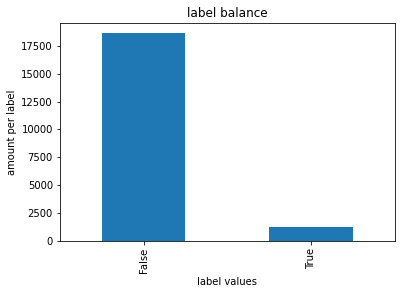

In [23]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [24]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

It is clear that the data is not balanced.

## Data balancing

In [25]:
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train, y_train = nr.fit_sample(X_train, y_train.ravel()) 
print("After Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train == 0))) 
X_test, y_test = nr.fit_sample(X_test, y_test.ravel()) 
print("After Undersampling, counts of label '1': {}".format(sum(y_test == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_test == 0))) 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

After Undersampling, counts of label '1': 1259
After Undersampling, counts of label '0': 1259
After Undersampling, counts of label '1': 281
After Undersampling, counts of label '0': 281


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Build models

In [26]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# # train the model on train set 
# knn.fit(X_train, y_train.ravel())   
# predictions = knn.predict(X_test) 
# # print classification report 
# print(classification_report(y_test, predictions)) 
# print(accuracy_score(y_test, predictions))

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
predictions = clf.predict(X_test) 
# print classification report 
print(classification_report(y_test, predictions)) 
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

       False       0.71      0.53      0.61       281
        True       0.63      0.78      0.70       281

    accuracy                           0.66       562
   macro avg       0.67      0.66      0.65       562
weighted avg       0.67      0.66      0.65       562

0.6583629893238434


In [28]:
# from sklearn import svm
# clf = svm.SVC()
# clf.fit(X_train, y_train.ravel())   
# predictions = clf.predict(X_test)
# # print classification report 
# print(classification_report(y_test, predictions)) 
# print(accuracy_score(y_test, predictions))